In [88]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [89]:
dir="C:\\ML DS\\test"
categories=['dogs','cats']
data=[]
for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)

    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        pet_img=cv2.imread(imgpath,0)
        try:
            pet_img=cv2.resize(pet_img,(50,50))
            image=np.array(pet_img).flatten()

            data.append([image,label])
        except Exception as e:
            pass
pick_in=open('data.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()
print(len(data))

140


In [90]:
pick_in=open('data.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

In [91]:
random.shuffle(data)
features=[]
labels=[]
for feature,label in data:
    features.append(feature)
    labels.append(label)






Accuracy: 1.0
prediction is: cats


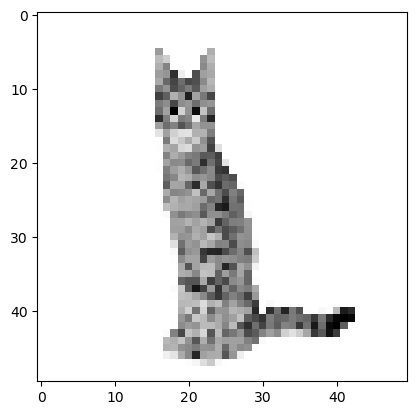

In [95]:
 xtrain,xtest,ytrain,ytest = train_test_split(features, labels, test_size = 0.01)
# model = SVC(C=1,kernel = 'poly',gamma = 'auto')
# model.fit(xtrain,ytrain)
pick=open('model.sav','rb')
model=pickle.load(pick)
pick.close()
prediction=model.predict(xtest)
accuracy=model.score(xtest,ytest)

categories=['dogs','cats']
print('Accuracy:',accuracy)
print('prediction is:',categories[prediction[0]])

mypet=xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()